<a href="https://colab.research.google.com/github/Minhhhh29/AI_1/blob/main/BTVN4_AI2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import kagglehub
import matplotlib.pyplot as plt

# 1. Tải dataset từ KaggleHub
path = kagglehub.dataset_download("quandang/vietnamese-foods")

# 2. Xác định thư mục chứa ảnh training
train_dir = os.path.join(path, "Images", "Train")
if not os.path.exists(train_dir):
    raise FileNotFoundError(f"Không tìm thấy thư mục: {train_dir}")

print("📂 Thư mục chứa ảnh Train:", train_dir)
print("📁 Danh sách lớp:", os.listdir(train_dir))

# 3. Đọc ảnh
img_size = 100
X = []
y = []

for label in os.listdir(train_dir):
    folder_path = os.path.join(train_dir, label)
    if os.path.isdir(folder_path):
        for img_file in os.listdir(folder_path):
            if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(folder_path, img_file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is None:
                    continue
                img = cv2.resize(img, (img_size, img_size))
                img = img.astype('float32') / 255.0
                X.append(img)
                y.append(label)

# 4. Thống kê
print("Tổng ảnh đọc được:", len(X))
print("Số lớp:", len(set(y)))
print("Nhãn:", set(y))

# 5. Kiểm tra dữ liệu
if len(X) == 0 or len(y) == 0:
    raise ValueError("Không có dữ liệu ảnh hoặc nhãn.")

# 6. Chuyển sang NumPy và mã hóa nhãn
X = np.array(X).reshape(-1, img_size, img_size, 1)

le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# 7. Tách train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42)

# 8. Kết quả
print("Load dữ liệu thành công!")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("Nhãn được mã hóa:", le.classes_)


📂 Thư mục chứa ảnh Train: /kaggle/input/vietnamese-foods/Images/Train
📁 Danh sách lớp: ['Banh cuon', 'Mi quang', 'Banh trang nuong', 'Goi cuon', 'Banh gio', 'Bun mam', 'Canh chua', 'Nem chua', 'Bun rieu', 'Banh duc', 'Banh pia', 'Banh canh', 'Banh khot', 'Banh bot loc', 'Banh can', 'Bun thit nuong', 'Banh chung', 'Bun dau mam tom', 'Banh beo', 'Banh tet', 'Cao lau', 'Chao long', 'Ca kho to', 'Bun bo Hue', 'Pho', 'Xoi xeo', 'Banh mi', 'Banh xeo', 'Com tam', 'Hu tieu']
Tổng ảnh đọc được: 17581
Số lớp: 30
Nhãn: {'Pho', 'Bun bo Hue', 'Banh bot loc', 'Bun rieu', 'Banh canh', 'Banh beo', 'Hu tieu', 'Goi cuon', 'Banh chung', 'Canh chua', 'Com tam', 'Banh can', 'Banh duc', 'Banh tet', 'Mi quang', 'Bun thit nuong', 'Banh khot', 'Chao long', 'Nem chua', 'Banh xeo', 'Cao lau', 'Bun dau mam tom', 'Bun mam', 'Banh cuon', 'Banh gio', 'Banh trang nuong', 'Ca kho to', 'Xoi xeo', 'Banh pia', 'Banh mi'}
Load dữ liệu thành công!
X_train: (14064, 100, 100, 1)
y_train: (14064, 30)
Nhãn được mã hóa: ['Banh 

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

num_classes = y_categorical.shape[1]

model = Sequential()
model.add(Flatten(input_shape=(img_size, img_size, 1)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 10000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,560,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 30)             │         3,870 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,597,022 (9.91 MB)

 Trainable params: 2,597,022 (9.91 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Tạo dữ liệu mẫu nhị phân
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Xây dựng mô hình
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # dùng sigmoid cho binary classification
])

# Compile mô hình
model.compile(
    optimizer=Adam(),
    loss=BinaryCrossentropy(),
    metrics=['accuracy']
)

# Huấn luyện mô hình
history = model.fit(
    X_train, y_train,
    epochs=70,
    batch_size=30,
    validation_data=(X_val, y_val)
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/70
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7840 - loss: 0.4740 - val_accuracy: 0.9105 - val_loss: 0.2480
Epoch 2/70
267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9047 - loss: 0.2700 - val_accuracy: 0.9255 - val_loss: 0.2245
Epoch 3/70
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9198 - loss: 0.2476 - val_accuracy: 0.9305 - val_loss: 0.2132
Epoch 4/70
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9278 - loss: 0.2346 - val_accuracy: 0.9335 - val_loss: 0.2118
Epoch 5/70
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9295 - loss: 0.2293 - val_accuracy: 0.9355 - val_loss: 0.2056
Epoch 6/70
267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9358 - loss: 0.2206 - val_accuracy: 0.9325 - val_loss: 0.2098
Epoch 7/70
267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9324 - loss: 0.2316 - val_accuracy: 0.9365 - val_loss: 0.2007
Epoch 8/70
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9385 - loss: 0.2069 - val_accuracy: 0

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
X = np.random.rand(1000, 100, 100, 1)  # 1000 ảnh grayscale
y = np.random.randint(0, 2, 1000)      # Nhãn: 0 hoặc 1

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # vì là bài toán phân loại nhị phân
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)
accuracy = model.evaluate(X_test, y_test)
print('Test loss:', accuracy[0])
print('Test accuracy:', accuracy[1])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 494ms/step - accuracy: 0.4904 - loss: 1.0554 - val_accuracy: 0.5312 - val_loss: 0.6922
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 506ms/step - accuracy: 0.5054 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 390ms/step - accuracy: 0.4879 - loss: 0.6932 - val_accuracy: 0.4688 - val_loss: 0.6936
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 398ms/step - accuracy: 0.5080 - loss: 0.6929 - val_accuracy: 0.4688 - val_loss: 0.6936
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 455ms/step - accuracy: 0.5222 - loss: 0.6922 - val_accuracy: 0.4688 - val_loss: 0.6950
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.5359 - loss: 0.6919 
Test loss: 0.692595899105072
Test accuracy: 0.5199999809265137


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


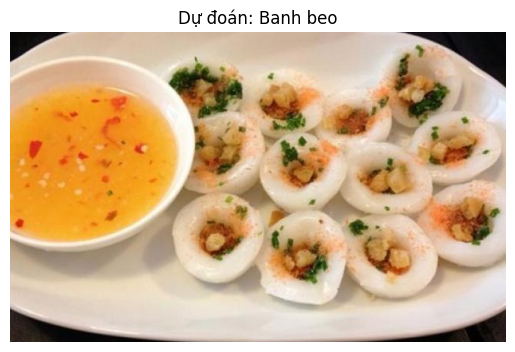

Softmax prediction: [[0.4918069]]
Dự đoán nhãn: Banh beo


In [13]:
def predict_food(image_path):
    # Đọc ảnh đầu vào
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Không thể đọc ảnh. Vui lòng kiểm tra lại đường dẫn:", image_path)
        return

    # Resize và normalize ảnh
    img = cv2.resize(img, (img_size, img_size))
    img = img.astype('float32') / 255.0
    img = img.reshape(1, img_size, img_size, 1)  # Điều chỉnh shape cho phù hợp với model

    # Dự đoán từ model
    prediction = model.predict(img)
    predicted_index = np.argmax(prediction)  # Chọn lớp có xác suất cao nhất
    predicted_label = le.inverse_transform([predicted_index])[0]  # Chuyển index thành nhãn

    # Hiển thị ảnh và kết quả dự đoán
    img_color = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    plt.imshow(img_color)
    plt.title(f"Dự đoán: {predicted_label}")
    plt.axis('off')
    plt.show()

    # In kết quả chi tiết của softmax
    print("Softmax prediction:", prediction)
    print("Dự đoán nhãn:", predicted_label)

# Gọi hàm dự đoán với đường dẫn ảnh bạn muốn thử
predict_food('/content/sample_data/foodVN.jpg')